In [1]:
# Data Processing
import numpy as np
from numpy import genfromtxt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Plotting
import matplotlib
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

## Settings

In [2]:
classical_features_path = 'C:\\Users\\alext\\Desktop\\School\\2021 Spring\\CS 271\\Final Project\\Feature Extraction\\Classical\\Classical Features.csv'
jazz_features_path = 'C:\\Users\\alext\\Desktop\\School\\2021 Spring\\CS 271\\Final Project\\Feature Extraction\\Jazz\\Jazz Features.csv'

# The algorithm used
algorithm_list = ['brute', 'ball_tree', 'kd_tree']
# The number of neareset neighbors to select
n_neighbors_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
# The power parameter for the BallTree and KDTree algorithms
p_list = [1.0, 1.5, 2.0, 2.5, 3.0]

# Set the plot font
font = {'family' : 'DejaVu Sans',
        'size'   : 18}

matplotlib.rc('font', **font)

## Load the Feature Data

In [3]:
def load_samples(group1_path, group2_path, num_train, num_clasif):
    num_to_load = num_train + num_clasif
    
    # Load enough features for training and classification
    group1_features = genfromtxt(group1_path, delimiter=',', max_rows=num_to_load)
    group2_features = genfromtxt(group2_path, delimiter=',', max_rows=num_to_load)
    
    # Get the training features from both groups
    training_X = group1_features[0:num_train, :]
    training_Y = group2_features[0:num_train, :]
    training_samples = np.concatenate((training_X, training_Y), axis=0)
    
    # Get the testing features from both groups
    testing_X = group1_features[num_train:num_to_load, :]
    testing_Y = group2_features[num_train:num_to_load, :]
    testing_samples = np.concatenate((testing_X, testing_Y), axis=0)
    
    # Get the classifications for the training and testing feature sets
    training_classifs = ([0] * num_train) + ([1] * num_train)
    testing_classifs = ([0] * num_clasif) + ([1] * num_clasif)
    
    return (training_samples, training_classifs, testing_samples, testing_classifs)

## Normalize Feature Sets

In [4]:
def normalize_features(training_samples, testing_samples):
    # Compute the mean and varience of each feature in the training set
    scaler = StandardScaler().fit(training_samples)

    # Normalize both the training and testing feature sets
    training_samples = scaler.transform(training_samples)
    testing_samples = scaler.transform(testing_samples)
    
    return (training_samples, testing_samples)

## Plot Accuracies

In [5]:
def plot_accuracies(variables, accuracies, variable_name, title_name):
    # Set the plot size
    figure(figsize=(8, 6), dpi=80)
    
    # Plot the data
    plot.plot(variables, accuracies, marker='.', markersize=15)
    
    # Set the titles
    plot.title(title_name)
    plot.xlabel(variable_name)
    plot.ylabel('Accuracy')
    
    # Force the x-axis to display integer ticks
    ax = plot.gca()
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    
    plot.show()

## Train Model

In [6]:
def train_model(training_samples, algorithm, n_neighbors=5, p=2):
    # Train the model using our training data
    model = KNeighborsClassifier(algorithm=algorithm, n_neighbors=n_neighbors, p=p)
    model.fit(training_samples, training_classifs)
    
    return model

## Load a Small Feature Set

In [7]:
# Load the feature data
sample_data = load_samples(classical_features_path, jazz_features_path, 1000, 1000)
training_samples  = sample_data[0]
training_classifs = sample_data[1]
testing_samples   = sample_data[2]
testing_classifs  = sample_data[3]

# Normalize the feature sets
(training_samples, testing_samples) = normalize_features(training_samples, testing_samples)

## Algorithm Testing

In [8]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for algorithm in algorithm_list:
    # Train the model
    model = train_model(training_samples, algorithm)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

## Plot the Algorithm Accuracies

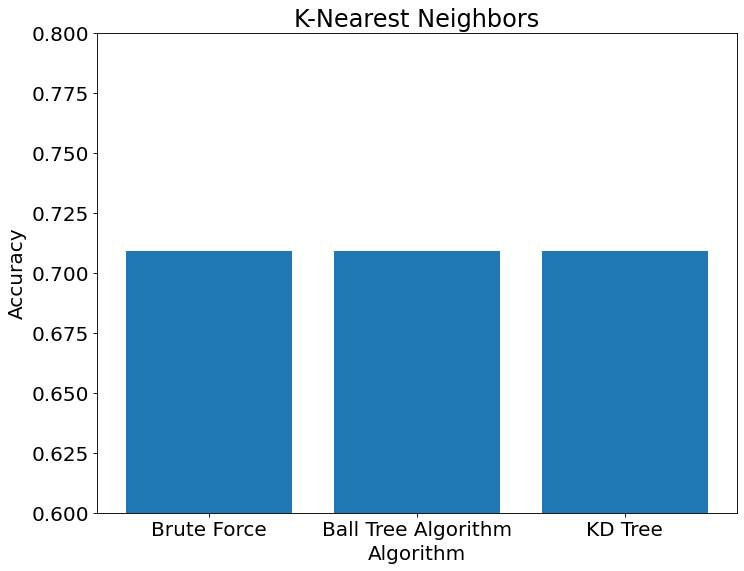

In [9]:
# Set the plot settings
fig = figure(figsize=(8, 6), dpi=80)
ax = fig.add_axes([0,0,1,1])

# Set the titles
ax.set_title('K-Nearest Neighbors')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Accuracy')

# Set the data
kernels = ['Brute Force', 'Ball Tree Algorithm', 'KD Tree']
ax.bar(kernels, accuracy_list)

# Set the y axis limits
plot.ylim([0.6, 0.8])

plot.show()

# Number of Neighbors Testing

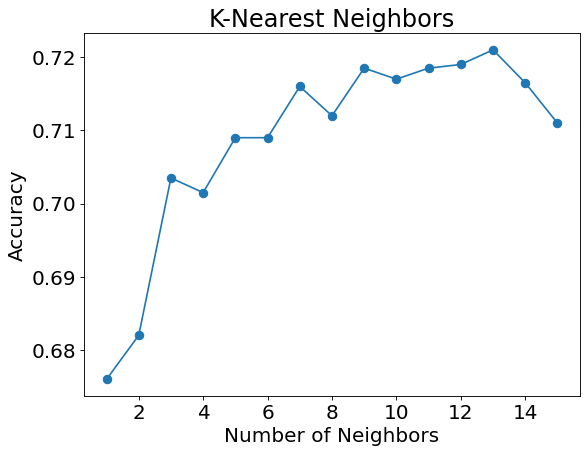

Best Accuracy: 72.1


In [10]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for n_neighbors in n_neighbors_list:
    # Train the model
    model = train_model(training_samples, 'kd_tree', n_neighbors)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(n_neighbors_list, accuracy_list, 'Number of Neighbors', 'K-Nearest Neighbors')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))

# Minkowski Metric Power

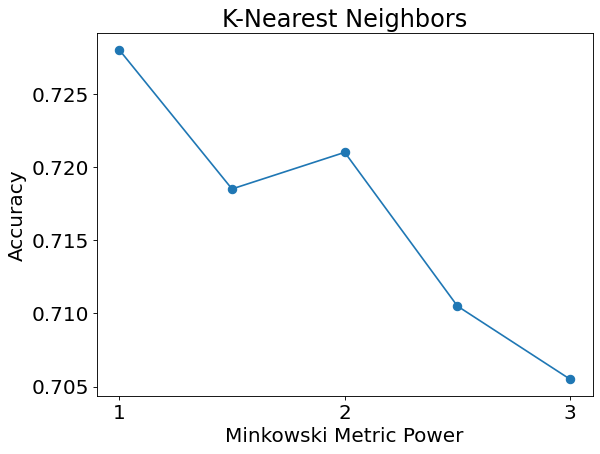

Best Accuracy: 72.8


In [11]:
accuracy_list = []

# Compute the accuracy with each margin softness value 
for p in p_list:
    # Train the model
    model = train_model(training_samples, 'kd_tree', n_neighbors=13, p=p)
    # Calculate the accuracy
    accuracy = model.score(testing_samples, testing_classifs)
    accuracy_list.append(accuracy)

# Plot the accuracies on a line graph
plot_accuracies(p_list, accuracy_list, 'Minkowski Metric Power', 'K-Nearest Neighbors')

print('Best Accuracy: {}'.format(max(accuracy_list) * 100))